# Argo Section in NATRE Region Studied in Ferrari 2005

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import seaborn as sns
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw

import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import processing_funcs as prf

## Section Selection

In [2]:
box = [-32,-26,23,29,0,2000]

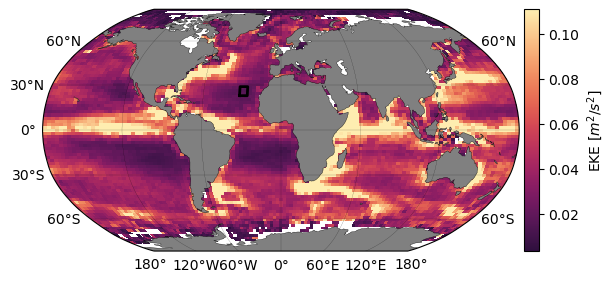

In [3]:
pf.plot_box([box])

In [4]:
scales = [50,100,200]
sample_max = 12
variables = ['CT','SA','SPICE']

In [5]:
sect = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-32,-26)_lat:(23,29)_ds_z.nc')
sect = 

sect_EKEct = ef.get_EKE_da(sect, scales, sample_max, variables[0])
sect_EKEsa = ef.get_EKE_da(sect, scales, sample_max, variables[1])
sect_EKEsp = ef.get_EKE_da(sect, scales, sample_max, variables[2])

In [6]:
sect_SIG1 = gsw.density.sigma1(sect.SA, sect.CT)
sect = sect.assign(SIG1=(['N_PROF','PRES_INTERPOLATED'], sect_SIG1.data))

In [7]:
sect

<xarray.Dataset>
Dimensions:            (N_PROF: 332, PRES_INTERPOLATED: 1000)
Coordinates:
  * N_PROF             (N_PROF) int64 1570 1574 1632 1578 ... 871 3469 872 873
    TIME               (N_PROF) datetime64[ns] 2006-08-26T04:30:02.000000256 ...
    LATITUDE           (N_PROF) float64 26.19 26.31 24.39 ... 25.02 23.06 23.15
    LONGITUDE          (N_PROF) float64 -26.17 -27.49 -27.21 ... -31.7 -31.82
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1992 1994 1996 1998
    N_PROF_NEW         (N_PROF) int64 ...
    MLD                (N_PROF) int64 ...
    month              (N_PROF) int64 ...
    month_frac         (N_PROF) float64 ...
    year               (N_PROF) int64 ...
    year_frac          (N_PROF) float64 ...
Data variables: (12/13)
    CT                 (N_PROF, PRES_INTERPOLATED) float64 24.53 24.53 ... 3.721
    CYCLE_NUMBER       (N_PROF) int64 ...
    DATA_MODE          (N_PROF) object ...
    DIRECTION          (N_PROF) object ...
    PLATFORM_NUMBER    (N_PROF) int64 ...
    PRES               (N_PROF, PRES_INTERPOLATED) float32 ...
    ...                 ...
    SA                 (N_PROF, PRES_INTERPOLATED) float64 37.64 37.64 ... 35.21
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 ...
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 ...
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 ...
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 6.651 6.651 ... 0.358
    SIG1               (N_PROF, PRES_INTERPOLATED) float64 29.51 29.51 ... 32.45
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/08/30
    Fetched_constraints:  [x=-32.00/-26.00; y=23.00/29.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

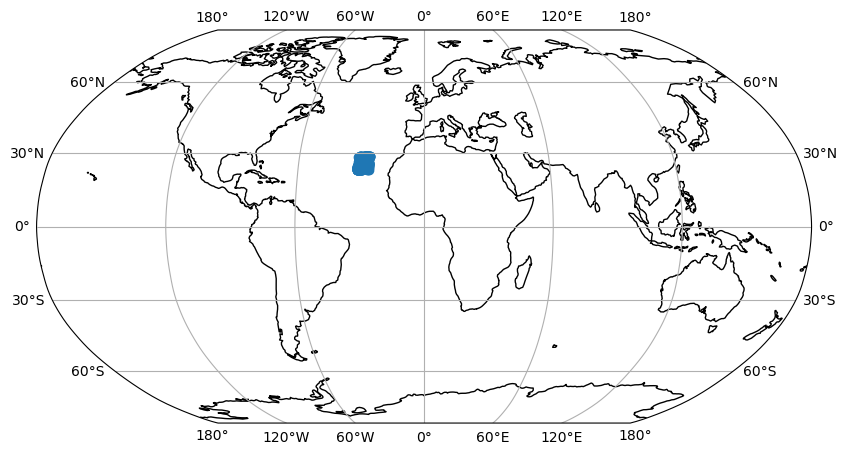

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
ax.gridlines(draw_labels=True)
ax.scatter(sect.LONGITUDE,sect.LATITUDE,transform=ccrs.PlateCarree())

## T,S,SIG0,SPICE Sections

In [9]:
#        CT                     SA                      SIG0                    SPICE                CT gradient                   SA gradient                   Spice gradient
names = [cmo.thermal,           cmo.haline,             cmo.dense,              cmo.deep,            cmo.balance,                  cmo.balance,                  cmo.balance]
bounds = [np.linspace(-2,22,7), np.linspace(33,36.5,8), np.linspace(24,28.5,6), np.linspace(-2,5,7), np.linspace(-0.004,0.004,10), np.linspace(-0.004,0.004,10), np.linspace(-0.004,0.004,10)]
cmaps = []
norms = []

for n in range(0,len(names)):
    cmap = names[n]
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    norm = mpl.colors.BoundaryNorm(bounds[n], cmap.N)
    
    cmaps.append(cmap)
    norms.append(norm)

In [11]:
sect   = sect      .sortby('LATITUDE')#.where(sect6.sample_rate<sample_max)
EKE_ct = sect_EKEct.sortby('LATITUDE').where(sect_EKEct.mask==1).isel(EKE=1)
EKE_sa = sect_EKEsa.sortby('LATITUDE').where(sect_EKEsa.mask==1).isel(EKE=1)
EKE_sp = sect_EKEsp.sortby('LATITUDE').where(sect_EKEsp.mask==1).isel(EKE=1)

levels0  = np.linspace(sect.isel(PRES_INTERPOLATED=slice(500,1500)).SIG0.min(),sect.isel(PRES_INTERPOLATED=slice(500,1500)).SIG0.max(),6)
levels1  = np.linspace(sect.isel(PRES_INTERPOLATED=slice(500,1500)).SIG1.min(),sect.isel(PRES_INTERPOLATED=slice(500,1500)).SIG1.max(),6)

l1_ct = ff.get_filt_single(sect,scales[0],'CT')
l1_sa = ff.get_filt_single(sect,scales[0],'SA')
l1_sp = ff.get_filt_single(sect,scales[0],'SPICE')

l2_ct = ff.get_filt_single(sect,scales[1],'CT')
l2_sa = ff.get_filt_single(sect,scales[1],'SA')
l2_sp = ff.get_filt_single(sect,scales[1],'SPICE')

grad_ct = l2_ct.differentiate('PRES_INTERPOLATED')
grad_sa = l2_sa.differentiate('PRES_INTERPOLATED')
grad_sp = l2_sp.differentiate('PRES_INTERPOLATED')

In [12]:
lat_points = []
for n in range(0,len(sect.LATITUDE)):
    array = np.full(len(sect.PRES_INTERPOLATED),sect.LATITUDE.isel(N_PROF=n).values)
    lat_points.append(array)
    
sect = sect.assign_coords(lat_points=(['N_PROF','PRES_INTERPOLATED'],lat_points))

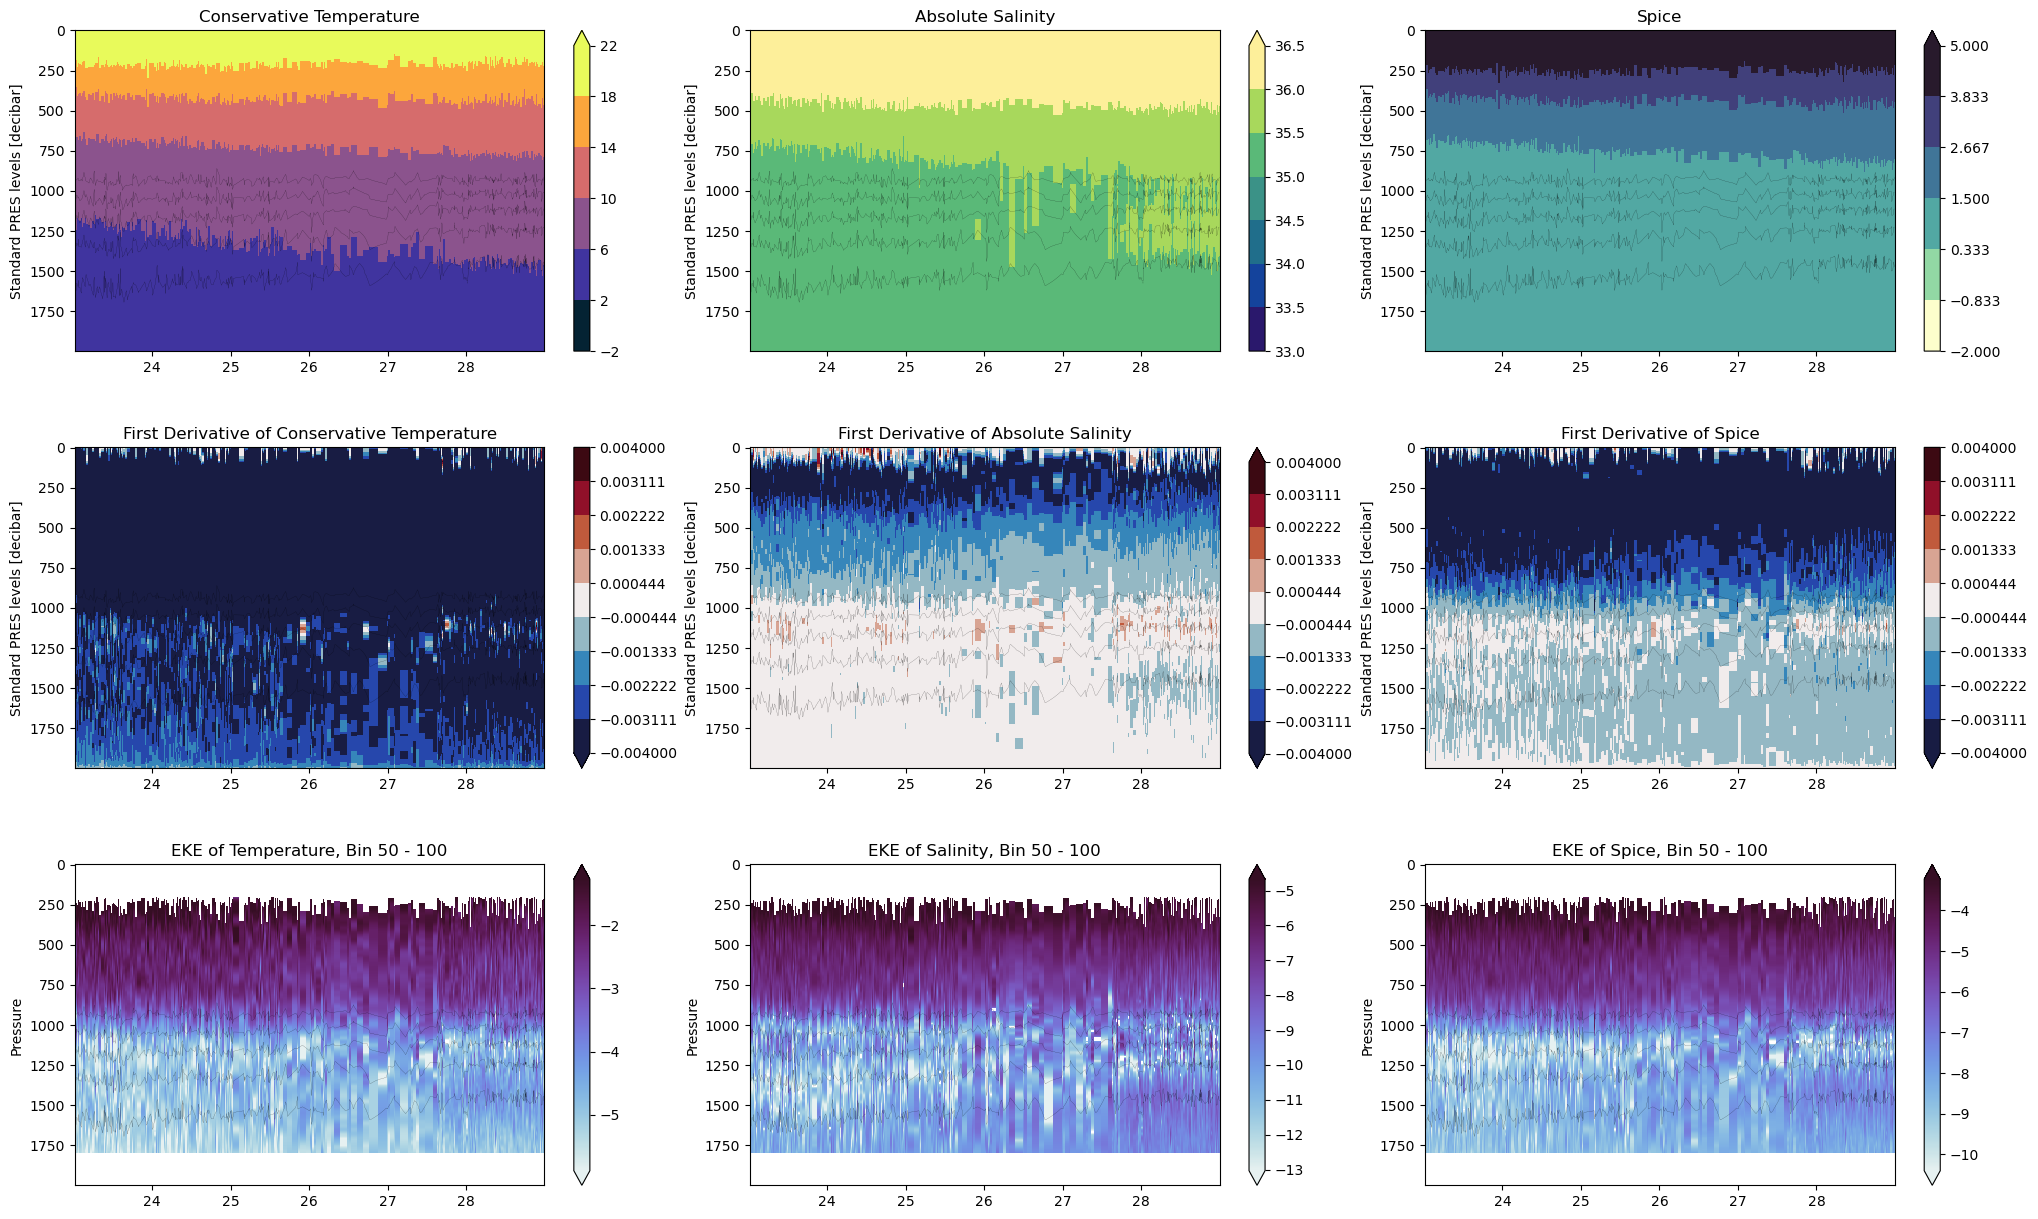

In [13]:
plt.figure(figsize=(25,15))

plt.subplot(331)
l2_ct.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[0], norm=norms[0])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
#sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('Conservative Temperature')

plt.subplot(332)
l2_sa.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[1], norm=norms[1])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('Absolute Salinity')

plt.subplot(333)
l2_sp.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[3], norm=norms[3])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('Spice')

plt.subplot(334)
grad_ct.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[4], norm=norms[4])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('First Derivative of Conservative Temperature')

plt.subplot(335)
grad_sa.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[5], norm=norms[5])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('First Derivative of Absolute Salinity')

plt.subplot(336)
grad_sp.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[6], norm=norms[6])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('First Derivative of Spice')

plt.subplot(337)
np.log(EKE_ct).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('EKE of Temperature, Bin {} - {}'.format(scales[0], scales[1]))

plt.subplot(338)
np.log(EKE_sa).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('EKE of Salinity, Bin {} - {}'.format(scales[0], scales[1]))

plt.subplot(339)
np.log(EKE_sp).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('EKE of Spice, Bin {} - {}'.format(scales[0], scales[1]))

plt.subplots_adjust(hspace=0.3, wspace=0.15)

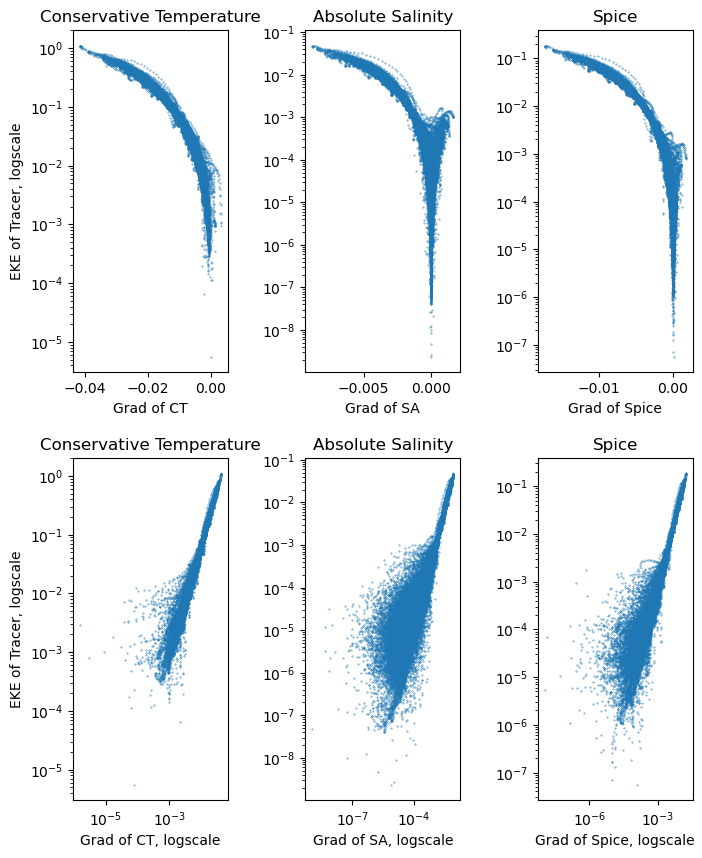

In [14]:
plt.figure(figsize=(8,10))

plt.subplot(231)
plt.scatter(grad_ct,EKE_ct,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xlabel('Grad of CT')
plt.ylabel('EKE of Tracer, logscale')
plt.title('Conservative Temperature')

plt.subplot(232)
plt.scatter(grad_sa,EKE_sa,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xlabel('Grad of SA')
plt.ylabel('')
plt.title('Absolute Salinity')

plt.subplot(233)
plt.scatter(grad_sp,EKE_sp,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xlabel('Grad of Spice')
plt.ylabel('')
plt.title('Spice')

plt.subplot(234)
plt.scatter(np.abs(grad_ct),EKE_ct,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grad of CT, logscale')
plt.ylabel('EKE of Tracer, logscale')
plt.title('Conservative Temperature')

plt.subplot(235)
plt.scatter(np.abs(grad_sa),EKE_sa,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grad of SA, logscale')
plt.ylabel('')
plt.title('Absolute Salinity')

plt.subplot(236)
plt.scatter(np.abs(grad_sp),EKE_sp,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grad of Spice, logscale')
plt.ylabel('')
plt.title('Spice')

plt.subplots_adjust(wspace=0.5, hspace=0.25)

## Gradient Plots

In [30]:
SA = np.linspace(int(sect.SA.min()), int(sect.SA.max())+1, 51)
CT = np.linspace(int(sect.CT.min()), int(sect.CT.max())+1, 51)

SA_grid, CT_grid = np.meshgrid(SA, CT)

rho = gsw.sigma0(SA_grid, CT_grid)
spice = gsw.spiciness0(SA_grid, CT_grid)

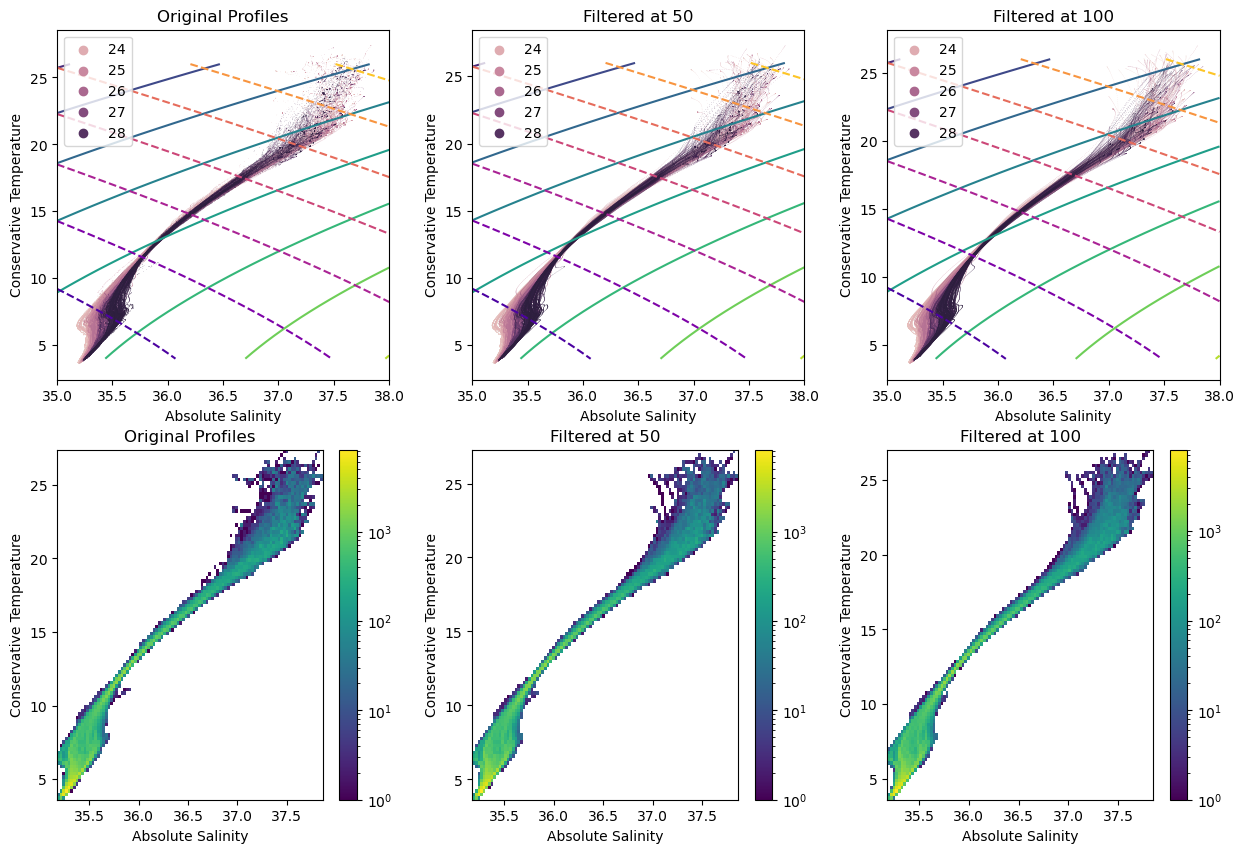

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(231)
sns.scatterplot(x=np.reshape(sect.SA.data,-1), y=np.reshape(sect.CT.data,-1), hue=np.reshape(sect.lat_points.data,-1), 
                linewidth=0, palette=sns.set_palette('flare',10),s=0.1)
plt.contour(SA, CT, rho, cmap='viridis')
plt.contour(SA, CT, spice, cmap='plasma', linestyles='--')
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Original Profiles')

plt.subplot(232)
sns.scatterplot(x=np.reshape(l1_sa.data,-1), y=np.reshape(l1_ct.data,-1), hue=np.reshape(sect.lat_points.data,-1), 
                linewidth=0, palette=sns.set_palette('flare',10),s=0.1)
plt.contour(SA, CT, rho, cmap='viridis')
plt.contour(SA, CT, spice, cmap='plasma', linestyles='--')
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Filtered at {}'.format(scales[0]))

plt.subplot(233)
sns.scatterplot(x=np.reshape(l2_sa.data,-1), y=np.reshape(l2_ct.data,-1), hue=np.reshape(sect.lat_points.data,-1), 
                linewidth=0, palette=sns.set_palette('flare',10),s=0.1)
plt.contour(SA, CT, rho, cmap='viridis')
plt.contour(SA, CT, spice, cmap='plasma', linestyles='--')
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Filtered at {}'.format(scales[1]))

plt.subplot(234)
plt.hist2d(np.reshape(sect.SA.data,-1),np.reshape(sect.CT.data,-1),bins=100,norm='log')
plt.colorbar()
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Original Profiles')

plt.subplot(235)
plt.hist2d(np.reshape(l1_sa.data,-1),np.reshape(l1_ct.data,-1),bins=100,norm='log')
plt.colorbar()
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Filtered at {}'.format(scales[0]))

plt.subplot(236)
plt.hist2d(np.reshape(l2_sa.data,-1),np.reshape(l2_ct.data,-1),bins=100,norm='log')
plt.colorbar()
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Filtered at {}'.format(scales[1]))

plt.subplots_adjust(wspace=0.25)

In [ ]:
# Based on your plot I chose range
SA = np.linspace(35, 38, 51)
CT = np.linspace(4, 26, 51)

SA_grid, CT_grid = np.meshgrid(SA, CT)

rho = gsw.sigma0(SA_grid, CT_grid)
spice = gsw.spiciness0(SA_grid, CT_grid)

plt.contour(SA, CT, rho, cmap='viridis')
plt.contour(SA, CT, spice, cmap='plasma', linestyles='--')

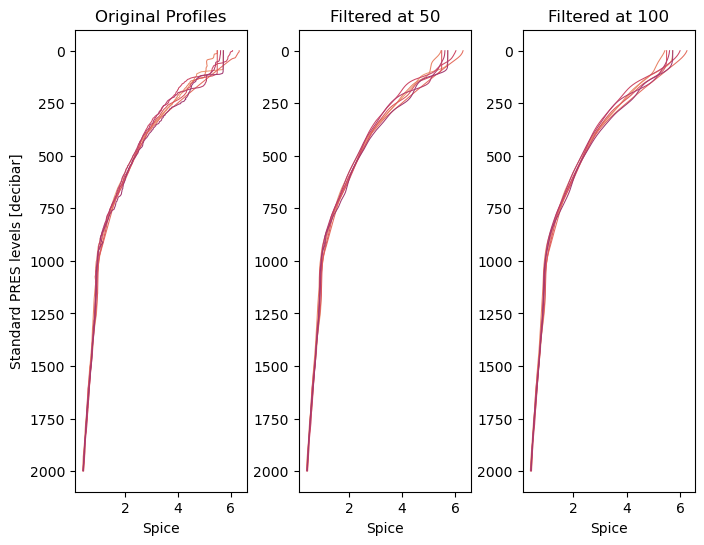

In [20]:
spice_or = sect.SPICE.where(sect.LATITUDE<26.15).where(sect.LATITUDE>26).dropna('N_PROF')
spice_l1 = l1_sp.where(l1_sp.LATITUDE<26.15).where(l1_sp.LATITUDE>26).dropna('N_PROF')
spice_l2 = l2_sp.where(l2_sp.LATITUDE<26.15).where(l2_sp.LATITUDE>26).dropna('N_PROF')

plt.figure(figsize=(8,6))
plt.subplot(131)
for n in range(0,len(spice_or)):
    spice_or[n].plot(y='PRES_INTERPOLATED',linewidth=0.75)
plt.xlabel('Spice')
plt.gca().invert_yaxis()
plt.title('Original Profiles')
    
plt.subplot(132)
for n in range(0,len(spice_or)):
    spice_l1[n].plot(y='PRES_INTERPOLATED',linewidth=0.75)
plt.xlabel('Spice')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.title('Filtered at {}'.format(scales[0]))

plt.subplot(133)
for n in range(0,len(spice_or)):
    spice_l2[n].plot(y='PRES_INTERPOLATED',linewidth=0.75)
plt.xlabel('Spice')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.title('Filtered at {}'.format(scales[1]))

plt.subplots_adjust(wspace=0.3)

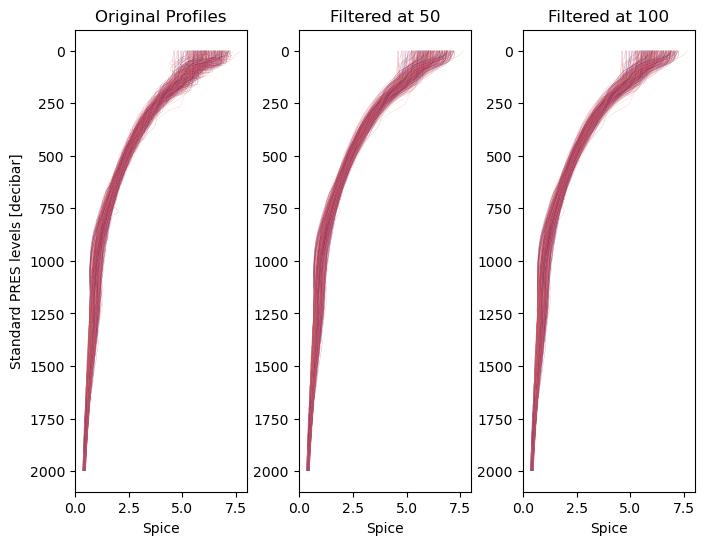

In [34]:
plt.figure(figsize=(8,6))
plt.subplot(131)
for n in range(0,len(sect.N_PROF)):
    sect.SPICE.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',linewidth=0.1)
plt.xlabel('Spice')
plt.gca().invert_yaxis()
plt.title('Original Profiles')
    
plt.subplot(132)
for n in range(0,len(l1_sp.N_PROF)):
    l1_sp.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',linewidth=0.1)
plt.xlabel('Spice')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.title('Filtered at {}'.format(scales[0]))

plt.subplot(133)
for n in range(0,len(l2_sp.N_PROF)):
    l1_sp.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',linewidth=0.1)
plt.xlabel('Spice')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.title('Filtered at {}'.format(scales[1]))

plt.subplots_adjust(wspace=0.3)